In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
afp= pd.read_csv('C:/Users/pal/Desktop/projects/Project_17/Automobile_fraudPrediction.csv')

In [3]:
def show_all(df, nrow=None, ncol=None):
    with pd.option_context('display.max_columns', ncol):
        display(df)
show_all(afp.head())

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
afp['police_report_available'].replace((" "),("No_info"), inplace=True)
afp['property_damage'].replace(("?"),("No_info"), inplace=True)
afp['collision_type'].replace(("?"),("No_info"), inplace=True)

In [5]:
show_all(afp.head(8))

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No_info,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,No_info,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,No_info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No_info,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,No_info,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,No_info,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN


In [6]:
afp.shape

(1000, 40)

In [7]:
afp.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
afp=afp.drop(['_c39'], axis=1)

In [9]:
afp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [10]:
afp.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [11]:
cat_features = list(afp.select_dtypes(include=['object']).columns)
print ("categorical values: {}".format(len(cat_features)))

cat_uniques = []
for cat in cat_features:
    cat_uniques.append(len(afp[cat].unique()))

afp_cat = pd.DataFrame.from_items([('cat_names', cat_features), ('unique_values', cat_uniques)])
show_all(afp_cat.head(21).T)

categorical values: 21


C:\Users\pal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
cat_names,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
unique_values,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2


In [12]:
afp=afp.drop(['incident_location', 'policy_number'], axis=1)

In [13]:
afp.shape

(1000, 37)

In [14]:
afp["policy_year"] = pd.to_datetime(afp["policy_bind_date"], format = '%d-%m-%Y').dt.year
afp["policy_day"] = pd.to_datetime(afp["policy_bind_date"], format = '%d-%m-%Y').dt.day
afp["policy_month"] = pd.to_datetime(afp["policy_bind_date"], format = '%d-%m-%Y').dt.month

In [15]:
afp["incident_year"] = pd.to_datetime(afp["incident_date"], format = '%d-%m-%Y').dt.year
afp["incident_day"] = pd.to_datetime(afp["incident_date"], format = '%d-%m-%Y').dt.day
afp["incident_month"] = pd.to_datetime(afp["incident_date"], format = '%d-%m-%Y').dt.month


In [16]:
show_all(afp.head(2))

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_year,policy_day,policy_month,incident_year,incident_day,incident_month
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,17,10,2015,25,1
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No_info,Minor Damage,Police,VA,Riverwood,8,1,No_info,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2006,27,6,2015,21,1


In [17]:
afp.drop(labels = 'policy_bind_date', axis = 1, inplace = True)
afp.drop(labels = 'incident_date', axis = 1, inplace = True)

In [18]:
afp.shape

(1000, 41)

Continuous: 23 features


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05CB6270>,
      dtype=object)

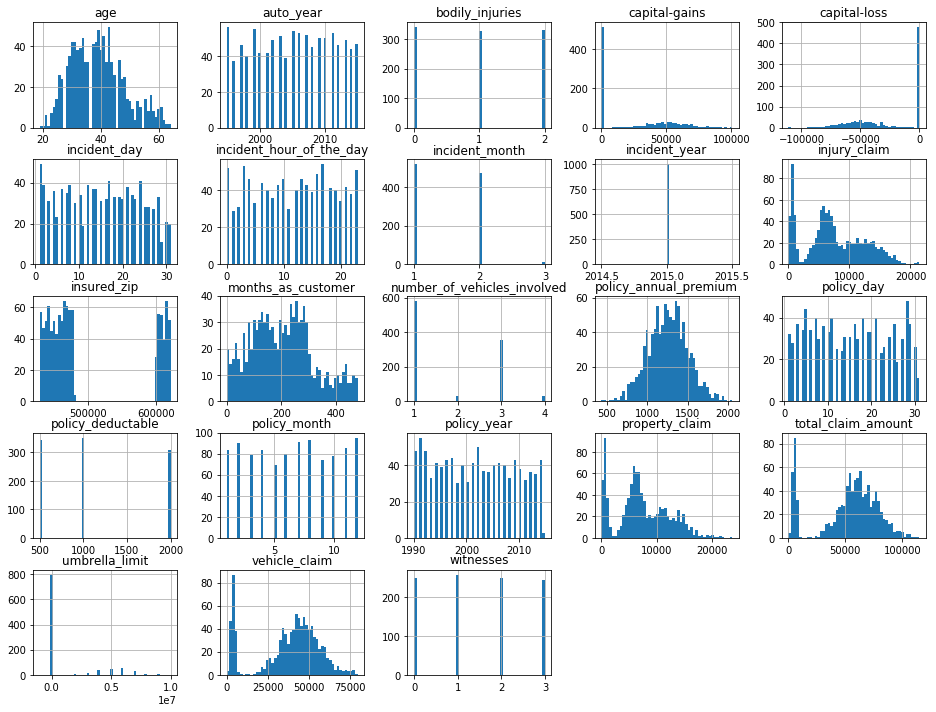

In [19]:
# analyze continuous features and their districution
cont_features = [cont for cont in list(afp.select_dtypes(
                 include=['float64', 'int64']).columns)]
print ("Continuous: {} features".format(len(cont_features)))
afp[cont_features].hist(bins=50, figsize=(16,12))

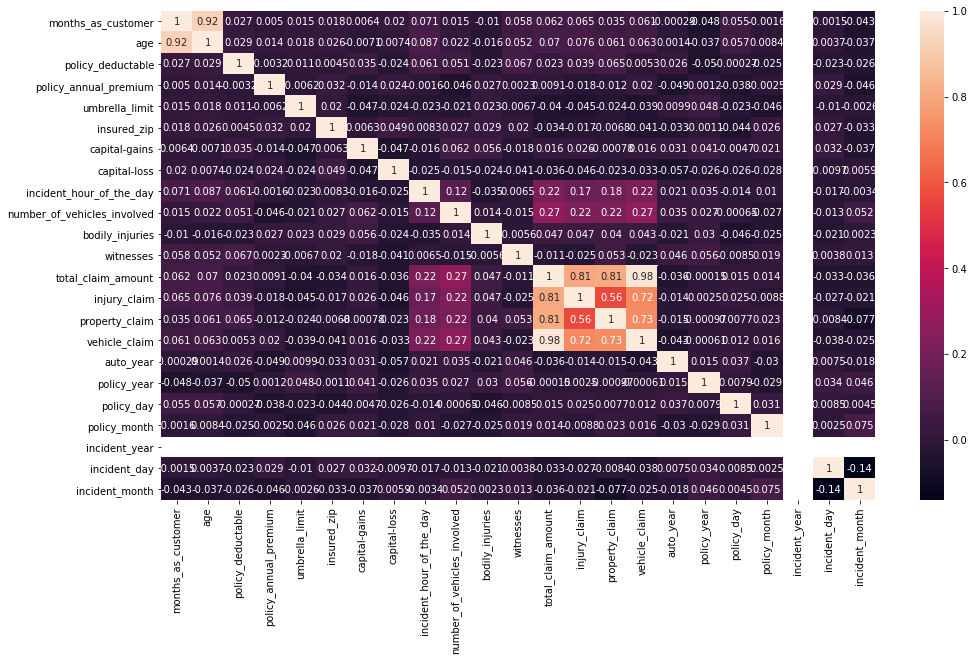

In [20]:
plt.subplots(figsize=(16,9))
correlation_mat = afp[cont_features].corr()
sns.heatmap(correlation_mat, annot=True)

In [21]:
afp["incident_year"].value_counts()

2015    1000
Name: incident_year, dtype: int64

In [22]:
afp=afp.drop(['incident_year'], axis=1)

C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


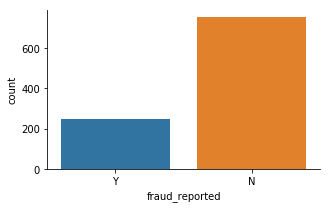

In [23]:
sns.factorplot(data=afp,kind='count',size=3,aspect=1.5,x='fraud_reported')

In [24]:
X=afp.drop('fraud_reported',axis=1)
y=afp['fraud_reported']


In [25]:
afp['fraud_reported'].replace("Y",1,inplace=True)
afp['fraud_reported'].replace("N",0,inplace=True)

In [26]:
X=pd.get_dummies(X)

In [27]:
X.shape

(1000, 167)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, precision_score,recall_score,f1_score

In [30]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
    ]

In [31]:
classifiers_columns = []
classifiers_compare = pd.DataFrame(columns = classifiers_columns)


row_index = 0
for alg in classifiers:
    
    
    alg.fit(X_train, y_train)
    y_pred= alg.predict(X_test)
    
    classifiers_name = alg.__class__.__name__
    classifiers_compare.loc[row_index,'Name'] = classifiers_name
    classifiers_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    classifiers_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    classifiers_compare.loc[row_index, 'accuracy_score'] = accuracy_score(y_test, alg.predict(X_test))
    classifiers_compare.loc[row_index, 'f1_score'] = f1_score(y_test, alg.predict(X_test))
    classifiers_compare.loc[row_index, 'recall_score'] = recall_score(y_test, alg.predict(X_test))
    classifiers_compare.loc[row_index, 'precision_score'] = precision_score(y_test, alg.predict(X_test))




    row_index+=1
    
classifiers_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
classifiers_compare

C:\Users\pal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pal\Anaconda3\lib\site-package

,Name,Train Accuracy,Test Accuracy,accuracy_score,f1_score,recall_score,precision_score
5,XGBClassifier,0.9662,0.765,0.765,0.525253,0.472727,0.590909
3,DecisionTreeClassifier,1.0000,0.760,0.760,0.547170,0.527273,0.568627
4,RandomForestClassifier,0.9888,0.740,0.740,0.395349,0.309091,0.548387
0,LogisticRegression,0.7600,0.725,0.725,0.000000,0.000000,0.000000
2,SVC,1.0000,0.725,0.725,0.000000,0.000000,0.000000
1,KNeighborsClassifier,0.7825,0.715,0.715,0.123077,0.072727,0.400000


In [32]:
features_list = list(afp.columns)


In [33]:
params = {'objective':'binary:logistic','max_depth': 5, 'learning_rate':1.0, 'silent':True,'n_estimators':500}
bst = xgb.XGBClassifier(**params).fit(X_train,y_train)
y_preds = bst.predict(X_test)

print ("Accuracy score", accuracy_score(y_test,y_preds))

Accuracy score 0.81


In [34]:
importances = list(bst.feature_importances_)
feature_importances = [(feature, round(importance,2)) for feature , importance in zip(features_list, importances)] 
feature_importances = sorted(feature_importances, key = lambda x:x[1], reverse = True)
for pair in feature_importances:
    print('Variable: {:20}                   Importance: {}'.format(*pair))

Variable: auto_model                             Importance: 0.03999999910593033
Variable: policy_deductable                      Importance: 0.019999999552965164
Variable: property_damage                        Importance: 0.019999999552965164
Variable: total_claim_amount                     Importance: 0.019999999552965164
Variable: policy_state                           Importance: 0.009999999776482582
Variable: insured_education_level                   Importance: 0.009999999776482582
Variable: collision_type                         Importance: 0.009999999776482582
Variable: incident_severity                      Importance: 0.009999999776482582
Variable: incident_state                         Importance: 0.009999999776482582
Variable: auto_year                              Importance: 0.009999999776482582
Variable: fraud_reported                         Importance: 0.009999999776482582
Variable: policy_year                            Importance: 0.009999999776482582
Variable: mont